PART 1: LOADING, VIEWING AND  UNDERSTANGING DATA

In [1]:
import pandas as pd

<Axes: title={'center': 'Area'}, ylabel='Frequency'>

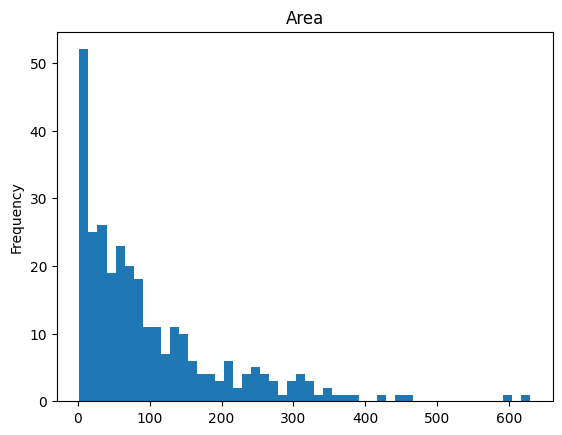

In [2]:
df = pd.read_csv('csv files/image_measurements.csv')
df['Area'].plot(kind= 'hist', title='Area', bins = 50)

In [3]:
data = [[10, 200, 60],
        [12, 155, 45],
        [9, 50, -45.],
        [16, 240, 90]] 

df = pd.DataFrame(data, columns = ['Area', 'Intensity', 'Orientation'])
df.index = range(1, len(df) + 1)
df

,Area,Intensity,Orientation
1,10,200,60.0
2,12,155,45.0
3,9,50,-45.0
4,16,240,90.0


In [6]:
df.index[3]

4

In [25]:
df = pd.read_csv('csv files/manual_vs_auto.csv')

print(df.info())  # Prvides an overview of the dataframe.
print(df.shape)   # How many rows and columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    object 
 1   Image       100 non-null    object 
 2   Manual      94 non-null     float64
 3   Manual2     3 non-null      float64
 4   Auto_th_2   100 non-null    int64  
 5   Auto_th_3   100 non-null    int64  
 6   Auto_th_4   100 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 5.6+ KB
None
(100, 7)


In [26]:
print(df)  #Shows a lot of stuff but truncated
print(df.head(7))  #Default prints 5 rows from the top
# First default column you see are indices. 
print(df.tail())   #Default prints 5 rows from the bottom

   Unnamed: 0     Image  Manual  Manual2  Auto_th_2  Auto_th_3  Auto_th_4
0        Set1    Image1    92.0     93.0         70         87         82
1        Set1    Image2    87.0     83.0         60         85         83
2        Set1    Image3   104.0     98.0         74         99         94
3        Set1    Image4    99.0      NaN         73        101        109
4        Set1    Image5    89.0      NaN         59         90         67
..        ...       ...     ...      ...        ...        ...        ...
95       Set4   Image96   106.0      NaN         75        112         98
96       Set4   Image97    80.0      NaN         66         80         88
97       Set4   Image98    92.0      NaN         73         93         95
98       Set4   Image99   116.0      NaN        101        115         93
99       Set4  Image100    99.0      NaN         77        106        102

[100 rows x 7 columns]
  Unnamed: 0   Image  Manual  Manual2  Auto_th_2  Auto_th_3  Auto_th_4
0       Set1  Ima

In [27]:
# First line in csv is considered header, even if you don't specify
# so it prints it out every time
# First column is the index and it goes from 0, 1, 2, ....
# Index is not part of the data frame
# INdex is the unique identifier of a row, in our case a specific grain in a specific image
# Any of the other columns can be assigned as index if we know it is a unique identifier. 

print(df.index)  # Defines start and stop with step size. Not very exciting with default index

#But can be useful if we assign other column as index. 
# df = df.set_index('Image')
print(df.head())


RangeIndex(start=0, stop=100, step=1)
  Unnamed: 0   Image  Manual  Manual2  Auto_th_2  Auto_th_3  Auto_th_4
0       Set1  Image1    92.0     93.0         70         87         82
1       Set1  Image2    87.0     83.0         60         85         83
2       Set1  Image3   104.0     98.0         74         99         94
3       Set1  Image4    99.0      NaN         73        101        109
4       Set1  Image5    89.0      NaN         59         90         67


In [28]:
#View all column names.

print(df.columns)

Index(['Unnamed: 0', 'Image', 'Manual', 'Manual2', 'Auto_th_2', 'Auto_th_3',
       'Auto_th_4'],
      dtype='object')


In [29]:
#Missing data is encoded as NaN so we can work with them in a friendly manner. 

print(df["Manual2"])  

0     93.0
1     83.0
2     98.0
3      NaN
4      NaN
      ... 
95     NaN
96     NaN
97     NaN
98     NaN
99     NaN
Name: Manual2, Length: 100, dtype: float64


In [30]:
#To get multiple columns, it is just
print(df[['Manual', 'Auto_th_2']])

    Manual  Auto_th_2
0     92.0         70
1     87.0         60
2    104.0         74
3     99.0         73
4     89.0         59
..     ...        ...
95   106.0         75
96    80.0         66
97    92.0         73
98   116.0        101
99    99.0         77

[100 rows x 2 columns]


In [ ]:
# To get the values of a specific index
df.loc[2]

Unnamed: 0      Set1
Image         Image3
Manual         104.0
Manual2         98.0
Auto_th_2         74
Auto_th_3         99
Auto_th_4         94
Name: 2, dtype: object

In [32]:
value = df.loc[2]['Manual']
print(value)

104.0


In [33]:
df.loc[[2,8]]

,Unnamed: 0,Image,Manual,Manual2,Auto_th_2,Auto_th_3,Auto_th_4
2,Set1,Image3,104.0,98.0,74,99,94
8,Set1,Image9,104.0,NaN,88,99,112


In [34]:
# We can also get specific values
df.loc[2, ['Manual']]      # df.loc[INDEX, COLUMN]

Manual    104.0
Name: 2, dtype: object

In [35]:
#Combining above two, to get specific columns from specific rows.

df = pd.read_csv('csv files/manual_vs_auto.csv')
print(df.loc[20:30, ['Manual', 'Auto_th_2']])

    Manual  Auto_th_2
20    89.0         65
21    88.0         66
22   106.0         71
23   107.0         92
24   108.0         93
25   102.0         85
26    93.0         76
27    83.0         62
28   110.0         92
29    89.0         70
30   115.0         77


In [36]:
# TO look at all unique entires. In this case, our 3 file names. 
print(df['Unnamed: 0'].unique())

# To get the max value of a column
print(df['Manual'].max())

['Set1' 'Set2' 'Set3' 'Set4']
120.0


In [37]:
#If unnamed is bothering you then you can change the name.
df = df.rename(columns = {'Unnamed: 0':'Image_set'})

df = df.rename(columns = {'equivalent_diameter':'Diameter(um)', 
                          'Area':'Area(sq. um)',
                          'orientation':'orientation (deg)',
                          'MajorAxisLength':'Length (um)',
                          'MinorAxisLength':'Width (um)',
                          'Perimeter':'Perimeter (um)'})

print(df.columns) 

Index(['Image_set', 'Image', 'Manual', 'Manual2', 'Auto_th_2', 'Auto_th_3',
       'Auto_th_4'],
      dtype='object')


In [38]:
print(df.dtypes)  

Image_set     object
Image         object
Manual       float64
Manual2      float64
Auto_th_2      int64
Auto_th_3      int64
Auto_th_4      int64
dtype: object


In [39]:
print(df.describe()) #Gives statistical summary of each column. 

           Manual    Manual2   Auto_th_2   Auto_th_3   Auto_th_4
count   94.000000   3.000000  100.000000  100.000000  100.000000
mean   100.021277  91.333333   76.370000   97.580000   93.210000
std     11.285140   7.637626   11.971055   12.327337   14.128769
min     80.000000  83.000000   55.000000   71.000000   63.000000
25%     90.250000  88.000000   67.750000   89.500000   83.750000
50%    101.000000  93.000000   74.500000   98.500000   93.000000
75%    108.000000  95.500000   85.000000  106.000000  103.250000
max    120.000000  98.000000  109.000000  124.000000  129.000000


In [40]:
# To see the amount of time a value is repeated

print(df['Auto_th_2'].value_counts().head())

# to see the count for a specific value
count = df['Auto_th_2'].value_counts().get(73, 0)
print("Count for 73: ", count)

# or
count = (df['Auto_th_2'] == 73).sum()
print("Count for 73:", count)



Auto_th_2
73    6
85    6
74    5
60    5
66    5
Name: count, dtype: int64
Count for 73:  6
Count for 73: 6


In [ ]:
# To see duplicates according to a specific column:

duplicate_manuals = df[df.duplicated(subset=['Manual'], keep=False)]
duplicate_manuals

,Image_set,Image,Manual,Manual2,Auto_th_2,Auto_th_3,Auto_th_4
0,Set1,Image1,92.0,93.0,70,87,82
1,Set1,Image2,87.0,83.0,60,85,83
2,Set1,Image3,104.0,98.0,74,99,94
3,Set1,Image4,99.0,NaN,73,101,109
4,Set1,Image5,89.0,NaN,59,90,67
...,...,...,...,...,...,...,...
95,Set4,Image96,106.0,NaN,75,112,98
96,Set4,Image97,80.0,NaN,66,80,88
97,Set4,Image98,92.0,NaN,73,93,95
98,Set4,Image99,116.0,NaN,101,115,93


# Difference between loc and iloc

iloc[0]
Accesses the first row by position (i.e., row at index 0 in the result).
It ignores the actual index label and just goes by order.

loc
Accesses rows by their label/index, not by position.
So using loc[0] means you're trying to access the row whose index label is literally 0, not the first row of the result.

iloc uses the Python stdlib indexing scheme, where the first element of the range is included and the last one excluded. loc, meanwhile, indexes inclusively.

This is particularly confusing when the DataFrame index is a simple numerical list, e.g. 0,...,1000. In this case df.iloc[0:1000] will return 1000 entries, while df.loc[0:1000] return 1001 of them! To get 1000 elements using loc, you will need to go one lower and ask for df.iloc[0:999].